In [1]:
! pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importation des bibliothèques
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 


In [3]:
#To connect Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img = image.load_img('/content/drive/MyDrive/AdvancedLearning/train/happy/josi.jpg')

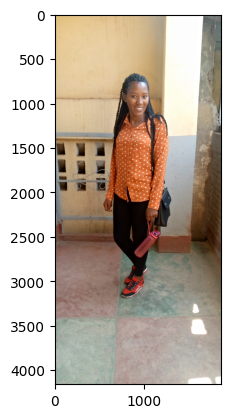

In [5]:
plt.imshow(img)

In [6]:
cv2.imread('/content/drive/MyDrive/AdvancedLearning/train/happy/josi.jpg').shape

(4160, 1872, 3)

In [7]:
train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [8]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/AdvancedLearning/train/', target_size=(200,200), batch_size=5, class_mode = 'binary')
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/AdvancedLearning/validation', target_size=(200,200), batch_size=5, class_mode = 'binary')

Found 2291 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    # first layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # second layers
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # thirts layers 
    tf.keras.layers.Flatten(),
    # Flatten layer
    tf.keras.layers.Dense(512, activation='relu'),
    #Dense layer
    tf.keras.layers.Dense(1, activation='sigmoid')
    # sigmoid layer
])


In [18]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [19]:
model_fit =model.fit(train_dataset, steps_per_epoch = 5, epochs = 20, validation_data= validation_dataset)

Epoch 1/20
5/5 [==============================] - 6s 1s/step - loss: 0.7971 - accuracy: 0.4800 - val_loss: 0.7515 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 4s 807ms/step - loss: 0.6211 - accuracy: 0.6800 - val_loss: 0.7563 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 4s 836ms/step - loss: 0.5345 - accuracy: 0.8000 - val_loss: 0.7612 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 4s 774ms/step - loss: 0.6864 - accuracy: 0.6000 - val_loss: 0.7517 - val_accuracy: 0.5000
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 0.4700 - accuracy: 0.8800 - val_loss: 0.7751 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 5s 1s/step - loss: 0.6720 - accuracy: 0.6400 - val_loss: 0.7721 - val_accuracy: 0.5000
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 0.4936 - accuracy: 0.8400 - val_loss: 0.7964 - val_accuracy: 0.5000
Epoch 8/20
5/5 [================

Text(0, 0.5, 'Trainning and Test loss ')

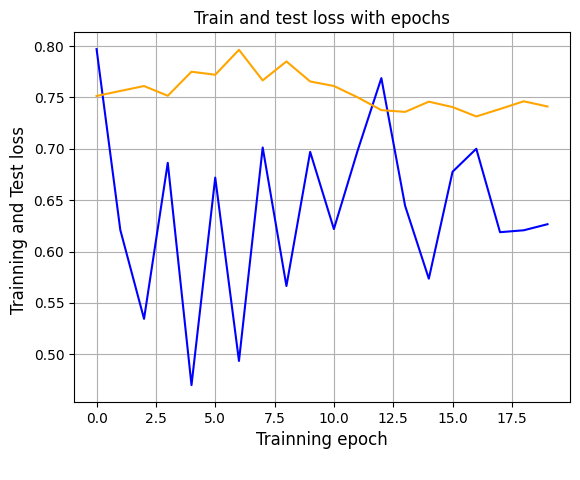

In [20]:
# ploting result 
plt.plot(model_fit.history['loss'], color ='blue', label ='train')
plt.plot(model_fit.history['val_loss'], color ='orange', label ='train')
plt.grid(True)
plt.title('Train and test loss with epochs')
plt.xlabel('Trainning epoch\n', fontsize=12)
plt.ylabel('Trainning and Test loss ', fontsize=12)

Text(0, 0.5, 'Trainning and Test accuracy ')

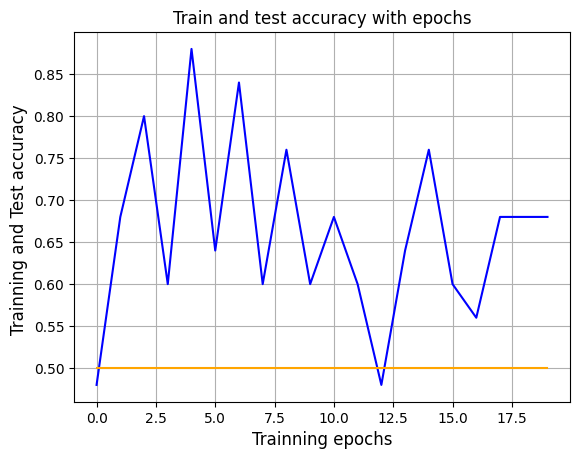

In [21]:
# ploting result 
plt.plot(model_fit.history['accuracy'], color ='blue', label ='train')
plt.plot(model_fit.history['val_accuracy'], color ='orange', label ='train')
plt.grid(True)
plt.title('Train and test accuracy with epochs')
plt.xlabel('Trainning epochs', fontsize=12)
plt.ylabel('Trainning and Test accuracy ', fontsize=12)

In [22]:
validation_dataset.class_indices

{'happy': 0, 'sad': 1}

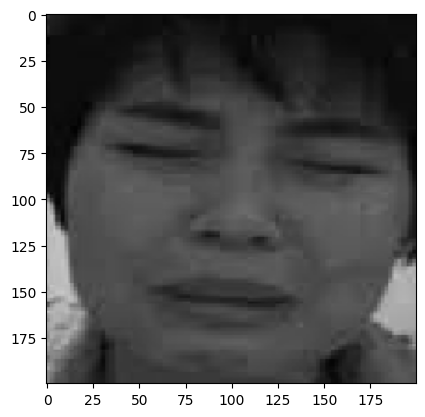

1/1 [==============================] - 0s 120ms/step
you are sad


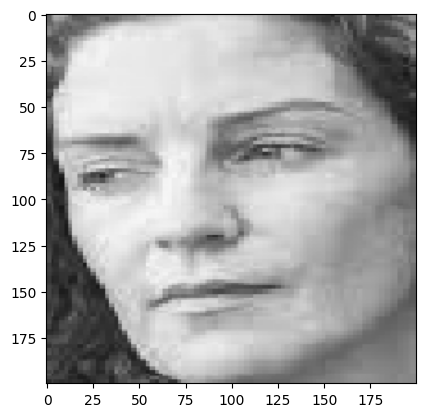

1/1 [==============================] - 0s 35ms/step
You are happy


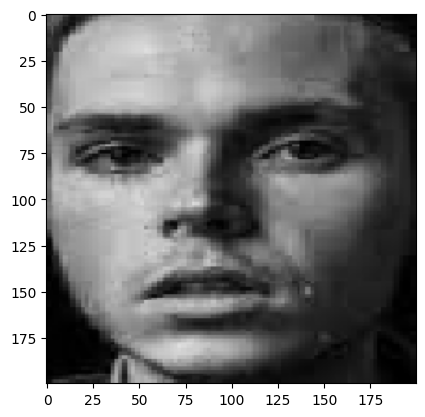

1/1 [==============================] - 0s 31ms/step
you are sad


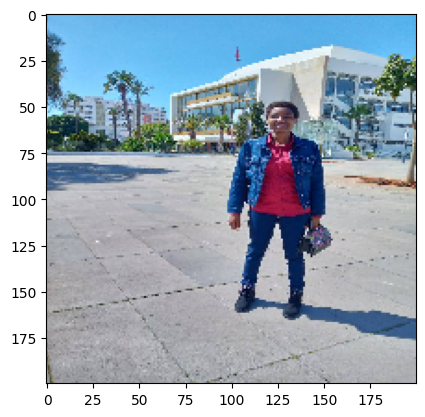

1/1 [==============================] - 0s 39ms/step
You are happy


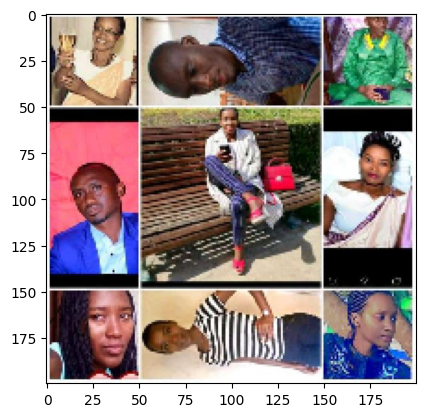

1/1 [==============================] - 0s 42ms/step
You are happy


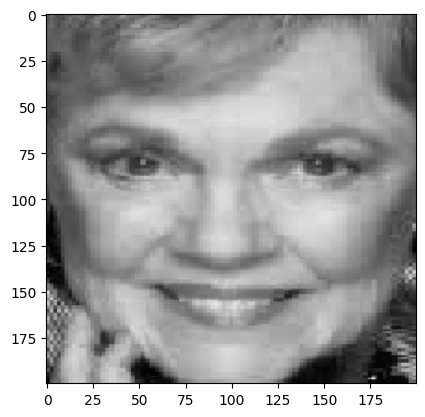

1/1 [==============================] - 0s 31ms/step
You are happy


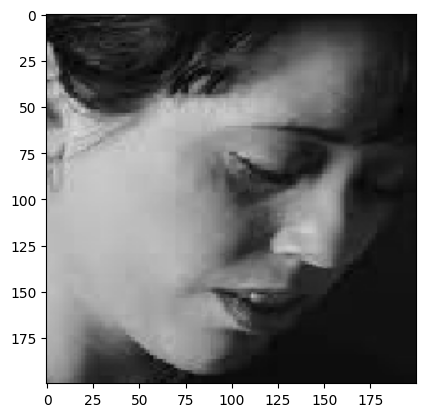

1/1 [==============================] - 0s 32ms/step
you are sad


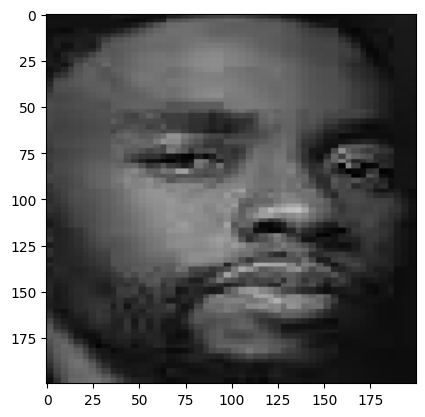

1/1 [==============================] - 0s 29ms/step
you are sad


In [23]:
dir_path = '/content/drive/MyDrive/AdvancedLearning/test/'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print('You are happy')
  else:
    print('you are sad')
  

In [24]:
model.save('/content/drive/MyDrive/AdvancedLearning/test/modele_final.h5')
